In [1764]:
import numpy as np
from typing import Union, List, Callable, Any, Tuple
import matplotlib.pyplot as plt

# Chapter 4.3-4.9 Numerical Integration

## Chapter 4.3 + 4.4 Composite Numerical Integration

### Composite Trapezoidal Rule
Let $f\in C^2[a, b], h=\frac{(b - a)}{n},$ and $x_j=a+jh,$ for each $j=0,1,\cdots,n$. There exists a $\mu\in(a, b)$ for which the __Composite Trapezoidal Rule__ for $n$ subintervals can be written with its error term as
$$
\int_a^bf(x)\,dx=\frac{h}{2}\biggl[
    f(a)+2\sum_{j=1}^{n-1}f(x_j)+f(b)
\biggr]-\frac{b-a}{12}h^2f''(\mu)
$$


In [1765]:
def Trapezoidal(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / N
    elif N is None:
        N = int((b - a) / h)
    x = np.linspace(a, b, N + 1)
    approx = h * (func(a) + func(b)) / 2
    for idx in range(1, N):
        approx += h * func(x[idx])
    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), color='chartreuse')
        plt.plot(x_, func(x_), 'r')
        for idx in range(N):
            xs = [x[idx], x[idx], x[idx + 1], x[idx + 1]]
            ys = [0, func(x[idx]), func(x[idx + 1]), 0]
            plt.fill(xs, ys, 'lightskyblue', edgecolor="black")
        plt.show()
    return approx

### Composite Midpoint Rule
The following codes implement two version of __Midpoint Rule__

i)Let $f\in C^2[a, b],\,\,n$ be even, $h=\frac{(b-a)}{n}$, and $x_j=a+jh$ for each $j=0,1\cdots,n$. There exists a $\mu\in(a, b)$ for which the __Composite Midppoint Rule__ for $n$ subintervals can be written with its error term as 
$$
\int_{a}^bf(x)\,dx=h\sum_{j=1}^{n}f\biggl(\frac{x_{j-1}+x_j}{2}\biggr)+\frac{b-a}{24}h^2f''(\mu)

$$

ii) Let $f\in C^2[a, b],\,\,n$ be even, $h=\frac{(b-a)}{n+2}$, and $x_j=a+(j+1)h$ for each $j=-1,0,\cdots,n+1$. There exists a $\mu\in(a, b)$ for which the __Composite Midppoint Rule__ for $n+2$ subintervals can be written with its error term as 
$$
\int_{a}^bf(x)\,dx=2h\sum_{j=0}^{n/2}f(x_{2j})+\frac{b-a}{6}h^2f''(\mu)

$$


In [1766]:
# Version 1 which compactible with any n
def Midpoint(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / N
    elif N is None:
        N = int((b - a) / h)
    step = h / 2
    x = np.linspace(a, b, N + 1)
    midpoints = x + step
    approx = 0

    for m in midpoints[:-1]:
        approx += func(m) * h

    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), color="chartreuse")
        plt.plot(x_, func(x_), 'r')
        for m in midpoints[:-1]:
            plt.bar(m, func(m), h, color='lightskyblue',  edgecolor="black")
            plt.plot([m, m], [0, func(m)], linestyle="--", color="red")
        plt.xticks(midpoints)
        plt.show()
    return approx

In [1767]:
# Version 2 which can only be used when n is even
def Midpoint_(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / (N + 2)
    elif N is None:
        N = int((b - a - 2 * h) / h)
    x = np.linspace(a, b, N + 3)
    midpoints = x
    approx = 0
    for m in midpoints[1:-1:2]:
        approx += func(m) * 2 * h

    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), color="chartreuse")
        plt.plot(x_, func(x_), 'r')
        for m in midpoints[1:-1:2]:
            plt.bar(m, func(m), 2 * h, color='lightskyblue',  edgecolor="black")
            plt.plot([m, m], [0, func(m)], linestyle="--", color="red")
        plt.xticks(midpoints)
        plt.show()
    return approx

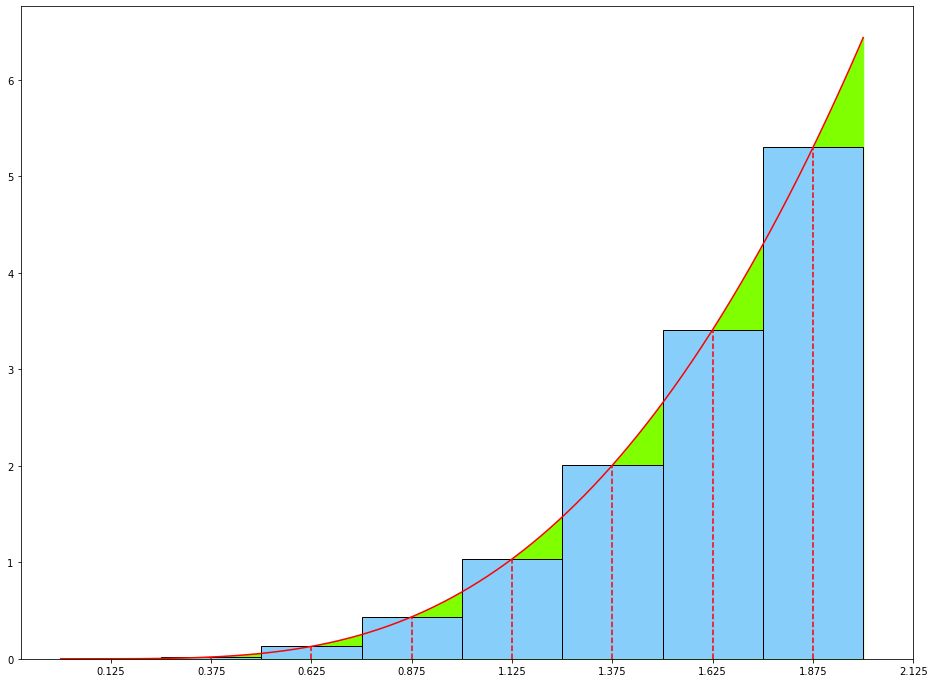

Version 1 :  3.084202849079324


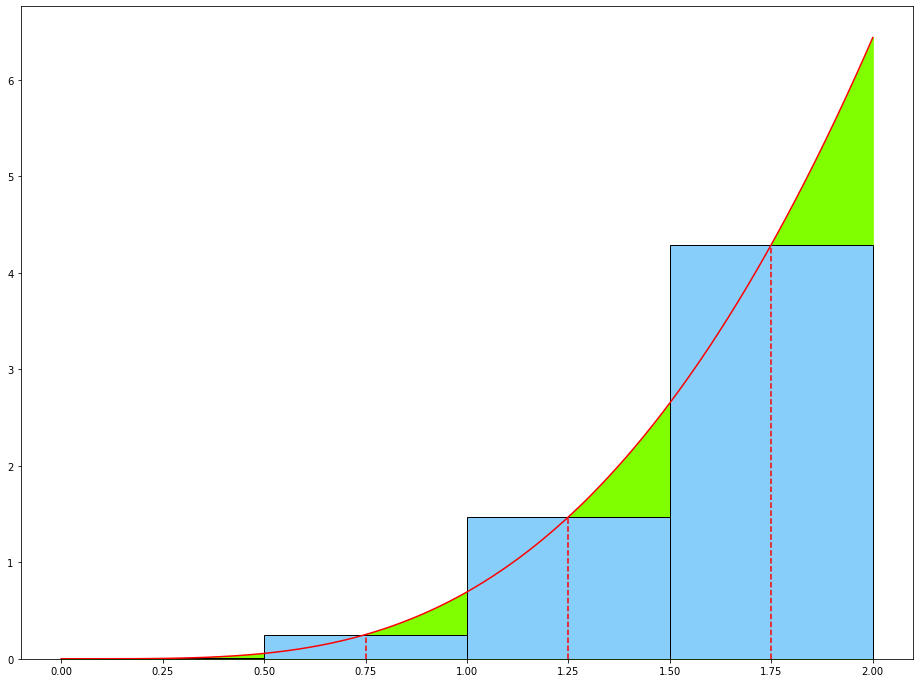

Version 2 :  3.009060031006947


In [1768]:
f = lambda x: x ** 2 * np.log(x ** 2 + 1)
print("Version 1 : ", Midpoint(f, 0, 2, h=0.25, visualize=True))
print("Version 2 : ", Midpoint_(f, 0, 2, h=0.25, visualize=True))

### Simpson's Rule
Let $f\in C^4[a, b]$, $n$ be even, $h=\frac{(b-a)}{n}$, and $x_j=a+jh$, for each $j=0,1,\cdots n.$ There exists a $\mu\in(a, b)$ for which the __Composite Simpson's Rule__ for $n$ subintervals can be written with its error term as
$$
\int_{a}^bf(x)\,dx=\frac{h}{3}\biggl[f(a)+2\sum_{j=1}^{\frac{n}{2}-1}f(x_{2j})+4\sum_{j=1}^{\frac{n}{2}}f(x_{2j-1})+f(b)\biggr]-\frac{b-a}{180}h^4f^{(4)}(\mu)
$$

Remark: The following NewtonDiff function is just to interpolate the parabola used in the approximation of the definite integral by the _Simpson's Rule_

In [1769]:
def NewtonDiff(func: Union[Callable[[Union[float, int]], float],
                           np.ndarray[Union[float, int], Any],
                           List[Union[int, float]]],
            x_: Union[np.ndarray[Union[float, int], Any], List[Union[int, float]]],
            return_Q: bool=False,
            ) -> Union[Callable[[Union[float, int]], float],
                       Tuple[Callable[[Union[float, int]], float], np.ndarray[Union[float, int], Any]]]:
    
    f_call = callable(func)
    n = len(x_)
    Q = np.zeros((n, n))
    
    for idx in range(n):
        Q[idx][0] = func(x_[idx]) if f_call else func[idx]

    for idx in range(1, n):
        for jdx in range(1, idx + 1):
            Q[idx][jdx] = (Q[idx][jdx - 1] -  Q[idx - 1][jdx - 1]) / (x_[idx] - x_[idx - jdx])

    def interpolation(x: float) -> float:
        appro = Q[0][0]
        for idx in range(1, n):
            prod = 1
            for jdx in range(idx):
                prod *= (x - x_[jdx])
            appro += Q[idx][idx] * prod 
        return appro

    return interpolation if not return_Q else (interpolation, Q)


In [1770]:
def Simpson(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           h:Union[float, int]=None,
           N:int=None, 
           visualize:bool=False) -> float:
    if (h is None) and (N is None):
        raise ValueError("h and N cannot be None at the same time")
    elif h is None:
        h = (b - a) / N
    elif N is None:
        N = int((b - a) / h)
    x = np.linspace(a, b, N + 1)

    approx = h * (func(a) + func(b)) / 3
    approx += h * (4 * np.sum(func(x[1:-1:2])) + 2 * np.sum(func(x[2:-1:2]))) / 3
    if visualize:
        plt.figure(figsize=(16, 12))
        x_ = np.linspace(a, b, 1000)
        plt.fill_between(x_, func(x_), color='chartreuse')
        plt.plot(x_, func(x_), 'r')
        for idx in range(0, N, 2):
            # Quadratic approximation points
            x_quad = [x[idx], x[idx + 1], x[idx + 2]]
            y_quad = [func(x[idx]), func(x[idx + 1]), func(x[idx + 2])]

            # Plotting the parabola
            quad_fit = np.polyfit(x_quad, y_quad, 2)
            quad_func = np.poly1d(quad_fit)
            x_parabola = np.linspace(x_quad[0], x_quad[2], 100)
            y_parabola = quad_func(x_parabola)
            plt.fill_between(x_parabola, y_parabola, color="lightyellow", edgecolor="black")

            poly = NewtonDiff(y_quad, x_quad)
            x_parabola = np.linspace(x_quad[0], x_quad[2], 100)
            y_parabola = poly(x_parabola)
            plt.fill_between(x_parabola, y_parabola, color="lightskyblue", edgecolor="black")

        plt.show()
    return approx

In [1771]:
# Exercise Set 4.4 Question 1
import pandas as pd
f = [
    lambda x: x * np.log(x), lambda x: x ** 3 *  np.exp(x),
    lambda x: 2 / (x ** 2 + 4), lambda x: x ** 2 * np.cos(x),
    lambda x: np.exp(2 * x) * np.sin(3 * x), lambda x: x / (x ** 2 + 4),
    lambda x: 1 / np.sqrt(x ** 2 - 4), lambda x: np.tan(x)
]
left = [1, -2, 0, 0, 0, 1, 3, 0]
right = [2, 2, 2, np.pi, 2, 3, 5, 3 * np.pi / 8]
N = [4, 4, 6, 6, 8, 8, 8, 8]
simpson = []
midpoint_2 = []
trapezoidal = [] 
for idx in range(len(f)):
    trapezoidal.append(Trapezoidal(f[idx], left[idx], right[idx], N=N[idx]))
    simpson.append(Simpson(f[idx], left[idx], right[idx], N=N[idx]))
    midpoint_2.append(Midpoint_(f[idx], left[idx], right[idx], N=N[idx]))
pd.DataFrame(
    {
        "Trapezoidal":trapezoidal, "Simpson":simpson, "Midpoint":midpoint_2
    },
    index=list("abcedfgh")
)


,Trapezoidal,Simpson,Midpoint
a,0.639900,0.636310,0.633096
b,31.365286,22.477125,11.156767
c,0.784241,0.785398,0.786700
e,-6.428722,-6.274868,-6.112736
d,-13.575979,-14.183342,-14.998477
f,0.476977,0.477755,0.478752
g,0.605498,0.604394,0.602961
h,0.970926,0.961055,0.947868


## Chapter 4.5 Romberg Integration
By an alternative method it can be shown that if $f\in C^{\infty}[a, b]$, the __Composite Trapezoidal Rule__ can also be written with an error term in the form of
$$
\int_{a}^{b}f(x)\,dx=\frac{h}{2}\biggl[
    f(a)+2\sum_{j=1}^{n-1}f(x_j)+f(b)
\biggr]+K_1h^2+K_2h^4+K_3h^6+\cdots
$$
where each $K_i$ is a constant depends only on $f^{(2i-1)}(a)$ and $f^{(2i-1)}(b)$
This is an obvious candidate for extrapolation. This results in a technique known as __Romberg Integration__

To obtain the __Romberg Integration__ for __Composite Trapezoidal Rule__, let $h_k=\frac{(b-a)}{2^{k-1}}$
$$
R_{k, 1}=\frac{1}{2}\biggl[
    R_{k-1, 1}+h_{k-1}\sum_{i=1}^{2^{k-2}}f(a+(2i-1)h_k)
\biggr]
$$
for each $k=2,3,\cdots,n$
$$
R_{k, j}=R_{k, j-1}+\frac{R_{k, j-1}-R_{k-1, j-1}}{4^{j-1}-1}
$$
for $k=j,j+1,\cdots$

The following codes implement the algorithm in two different way:

i)Version 1: Plain version without optimize the storage

ii)Version 2: Modified version with storage optimization with using just two rows

In [1772]:
# Version 1
def Romberg(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           N:int=None) -> np.ndarray[Union[float, int], Any]:
    R = np.zeros((N, N))
    h = b - a
    R[0][0] = h * (func(a) + func(b)) / 2

    for idx in range(1, N):
        R[idx, 0] = R[idx - 1, 0]
        for jdx in range(1, int(2 ** (idx - 1)) + 1):
            R[idx, 0] += h * func(a + (jdx - 0.5) * h)
        R[idx, 0] /= 2
        h /= 2
    for idx in range(1, N):
        for jdx in range(idx, N):
            R[jdx, idx] = R[jdx, idx - 1] + (R[jdx, idx - 1] - R[jdx - 1, idx - 1]) / (4 ** idx - 1)
    return R

In [1773]:
# Version 2
def Romberg_(func:Callable[[Union[float, int, np.ndarray]], Union[float, int]],
           a:Union[float, int],
           b:Union[float, int],
           N:int=None) -> np.ndarray[Union[float, int], Any]:
    R = np.zeros((2, N))
    h = b - a
    R[0][0] = h * (func(a) + func(b)) / 2

    for idx in range(1, N):
        R[1, 0] = R[0, 0]
        for jdx in range(1, int(2 ** (idx - 1)) + 1):
            R[1, 0] += h * func(a + (jdx - 0.5) * h)
        R[1, 0] /= 2
        h /= 2
        for jdx in range(1, idx + 1):
            R[1, jdx] = R[1, jdx - 1] + (R[1, jdx - 1] - R[0, jdx - 1]) / (4 ** jdx - 1)
        R[0] = R[1]
    return R[-1, :]

In [1774]:
f = lambda x: np.sin(x)
print(Romberg(f, 0, np.pi, 6))
print(Romberg_(f, 0, np.pi, 6))

[[1.92367069e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.57079633e+00 2.09439510e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.89611890e+00 2.00455975e+00 1.99857073e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.97423160e+00 2.00026917e+00 1.99998313e+00 2.00000555e+00
  0.00000000e+00 0.00000000e+00]
 [1.99357034e+00 2.00001659e+00 1.99999975e+00 2.00000002e+00
  1.99999999e+00 0.00000000e+00]
 [1.99839336e+00 2.00000103e+00 2.00000000e+00 2.00000000e+00
  2.00000000e+00 2.00000000e+00]]
[1.99839336 2.00000103 2.         2.         2.         2.        ]
